# Introduction

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking one of the deadliest for a single ship up to that time.It remains to this day the deadliest peacetime sinking of a superliner or cruise ship. The disaster drew much public attention, provided foundational material for the disaster film genre, and has inspired many artistic works.

# Importing Libraries 

In [1]:
# Data Handling
import pandas as pd 

# Math
import numpy as np
import math

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Machine Learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Loading Data

## Data dictionary

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 	0 = No, 1 = Yes |
| pclass | Ticket class | 	1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex | - 
| Age | Age in years | -
| sibsp | 	# of siblings / spouses aboard the Titanic | -
| parch | 	# of parents / children aboard the Titanic | -
| ticket | 	Ticket number | -
| fare | 	Passenger fare | -
| cabin | Cabin number | -
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
train = pd.read_csv("./Dataset/train.csv") #Importing training data
test = pd.read_csv("./Dataset/test.csv") #Importing testing data
test1 = test #Useful later for result

In [3]:
train.head(10) #Viewing the train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10) #Viewing the test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Data Analysis

## Passengers and their survival

### Passengers and survival ratio

<AxesSubplot:xlabel='Survived', ylabel='count'>

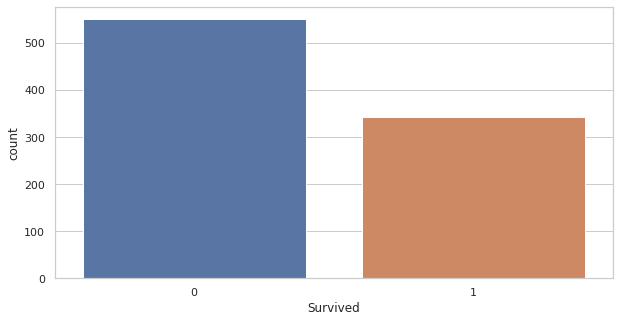

In [5]:
plt.figure(figsize=(10,5)) #Setting the graph size
sns.set_theme(style="whitegrid") #Setting the graph theme 
sns.countplot(x="Survived", data = train) #Creating the graph


More people were killed than survived

### Survival based on sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

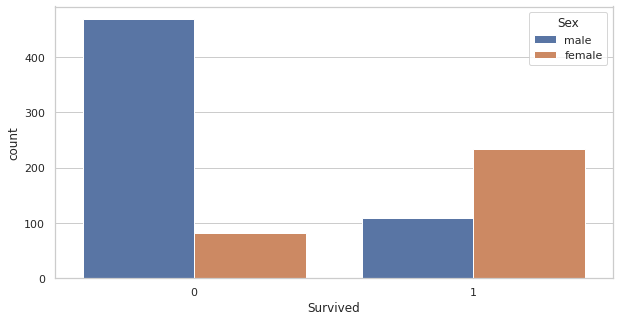

In [6]:
plt.figure(figsize=(10,5)) #Setting the graph size
sns.set_theme(style="whitegrid") #Setting the graph theme 
sns.countplot(x="Survived", hue="Sex", data = train) #Creating the graph

More females survived and more men were killed. <br>
Very few men (under 100) survived

### Survival based on class

<AxesSubplot:xlabel='Survived', ylabel='count'>

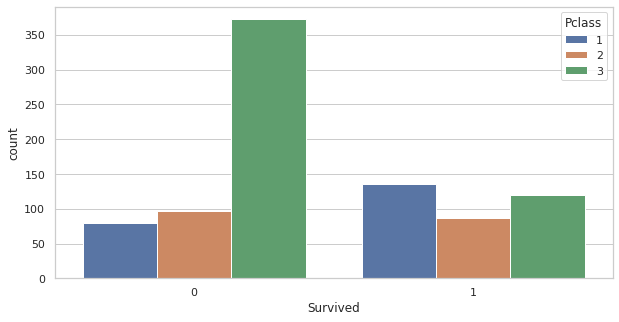

In [7]:
plt.figure(figsize=(10,5)) #Setting the graph size
sns.set_theme(style="whitegrid") #Setting the graph theme 
sns.countplot(x="Survived", hue="Pclass", data = train) #Creating the graph

<AxesSubplot:xlabel='Pclass', ylabel='count'>

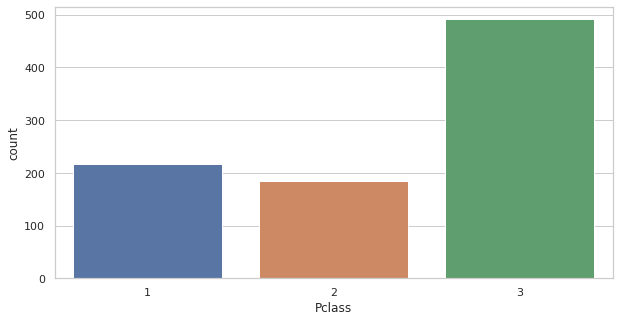

In [8]:
plt.figure(figsize=(10,5)) #Setting the graph size
sns.set_theme(style="whitegrid") #Setting the graph theme 
sns.countplot(x="Pclass", data = train) #Creating the graph

The higher class survived more than the lowerclass. <br>
The reason the third class has more survivers than second class is because they had the most number of passengers.

## Age distribution

<AxesSubplot:ylabel='Age'>

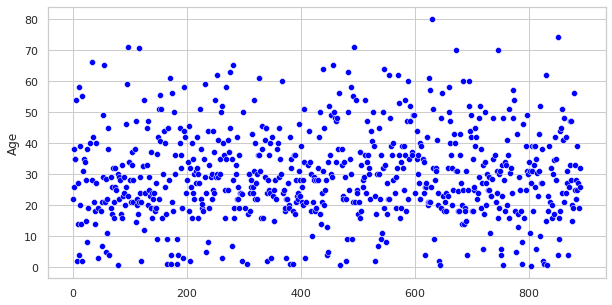

In [9]:
plt.figure(figsize=(10,5)) #Setting the graph size
sns.set_theme(style="whitegrid") #Setting the graph theme
sns.scatterplot(data = train.Age, color="blue") #Creating the graph

Most of the paseengers were between the age of 20 - 40

# Data Wrangling

## Looking for null values and removing them

### Training data

<AxesSubplot:>

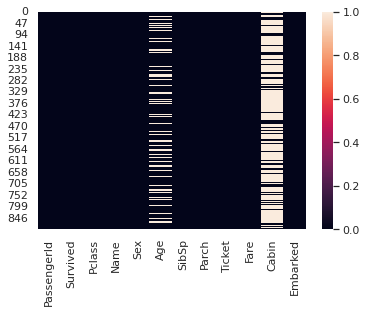

In [10]:
sns.heatmap(train.isnull()) #Visualising the null values

In [11]:
train = train.dropna() #Removing the null values
train.drop("Cabin", axis=1, inplace=True) #Removing cabin column as its not needed

### Test data

<AxesSubplot:>

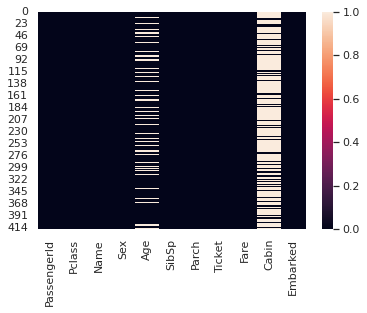

In [12]:
sns.heatmap(test.isnull()) #Visualising the null values

In [13]:
test.drop('Cabin', axis = 1, inplace = True)

In [14]:
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

# Machine learning model

## Preparing the data for Machine learning

### Preparing the training data

In [15]:
pclass = pd.get_dummies(train.Pclass, drop_first = True) #Converting into categorical columns
sex = pd.get_dummies(train.Sex, drop_first = True) #Converting into categorical columns
embark = pd.get_dummies(train.Embarked, drop_first = True) #Converting into categorical columns

train = pd.concat([train, pclass, sex, embark], axis = 1) #Adding our new columns
train.drop(['PassengerId', 'Pclass', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True) #Removing the old columns

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()

In [17]:
train['Age']= min_max_scaler.fit_transform(train[['Age']])
train['Fare']= min_max_scaler.fit_transform(train[['Fare']])

X_train = train.drop('Survived', axis = 1) #Removing the survived column for x 
y_train = train.Survived # y is the survived column

### Preparing the testing data

In [18]:
pclass1 = pd.get_dummies(test.Pclass, drop_first = True) #Converting into categorical columns
sex1 = pd.get_dummies(test.Sex, drop_first = True) #Converting into categorical columns
embark1 = pd.get_dummies(test.Embarked, drop_first = True) #Converting into categorical columns

test = pd.concat([test, pclass1, sex1, embark1], axis = 1) # Adding our new columns

test.drop(['PassengerId', 'Pclass', 'Sex', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True) #Dropping columns not needed for test data

test['Age']= min_max_scaler.fit_transform(test[['Age']]) 
test['Fare']= min_max_scaler.fit_transform(test[['Fare']])

X_test = test #Creating a variable for the model

## Logistic Regression

In [19]:
model = LogisticRegression(solver='liblinear') #Setting our model type
model.fit(X_train, y_train) #Training model

predictions = model.predict(X_test) #Getting our predictions

output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': predictions}) #Creating a dataframe with our predictions
output.to_csv('submission.csv', index=False) #Exporting to CSV for submission

/home/shayan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/shayan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Evaluating model performance

In [29]:
model.score(X_train, y_train)

/home/shayan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7650273224043715